In [1]:
from math import sin,cos,tan,asin,acos,atan,pi,sqrt,log
import sympy as sy
import numpy as np
from sympy import *

mm=0.001

#重点知识：
    #弹性模量 E=图像斜率
    #τ=剪切力(相对截面)
    #σ=正应力(相对截面)
    # 直径变化量=正应变×泊松比×直径
    # 三者关系 G=E/[2(v+1)]
    # 剪应变 = 角度变化 = 近似为 tanθ
重点题目
---
1.最后一道题的正负号

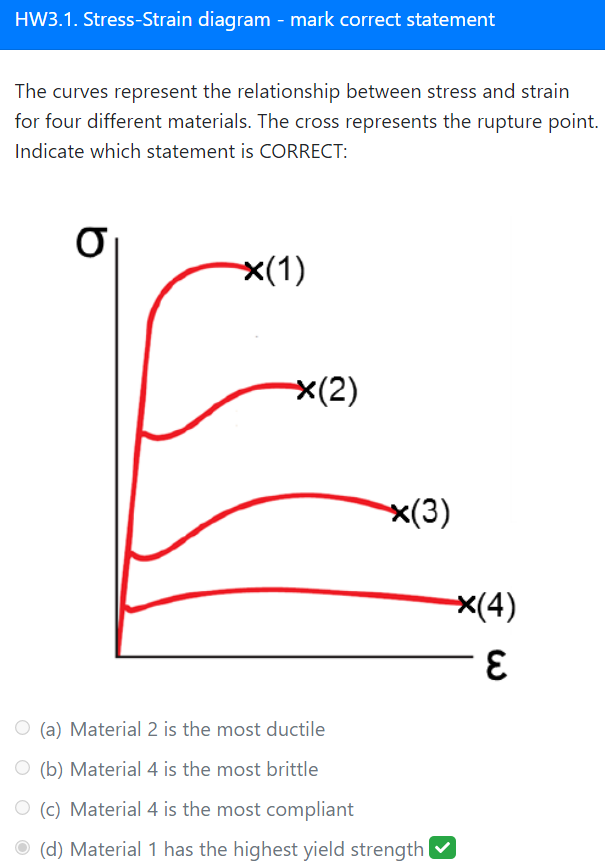
#材料1的屈服应力最大 (Yield Strength)
#材料1最容易断 (brittle)
#材料4的延展性最好 (ductile)

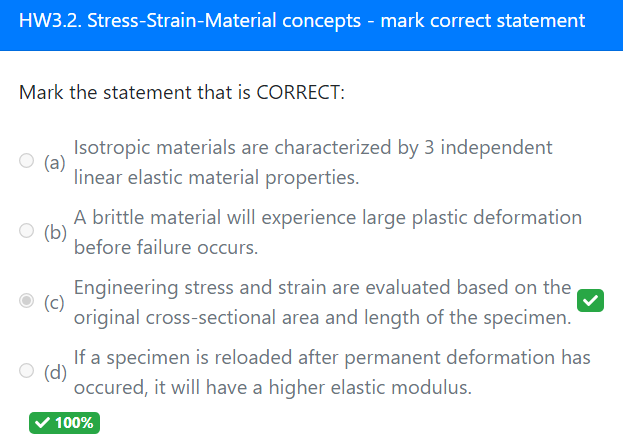

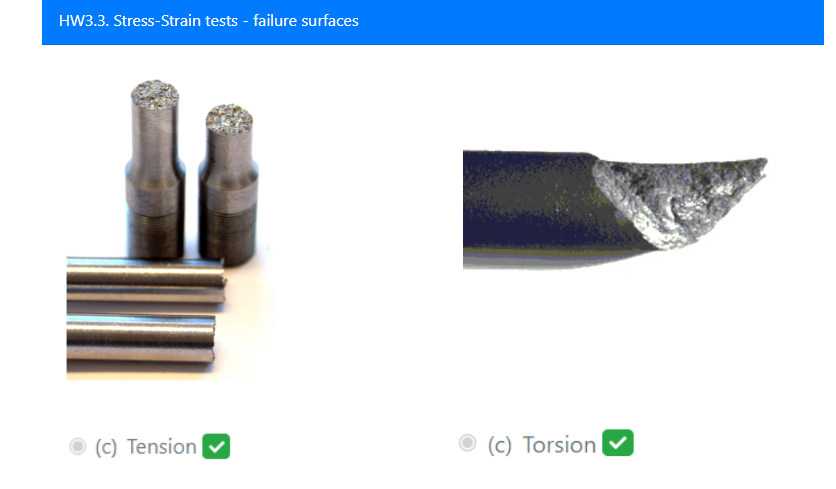

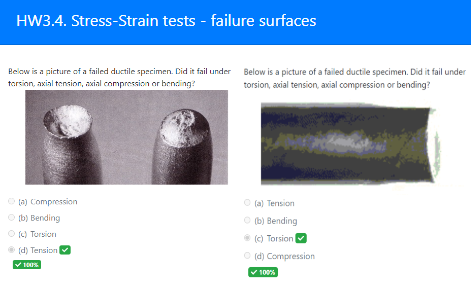

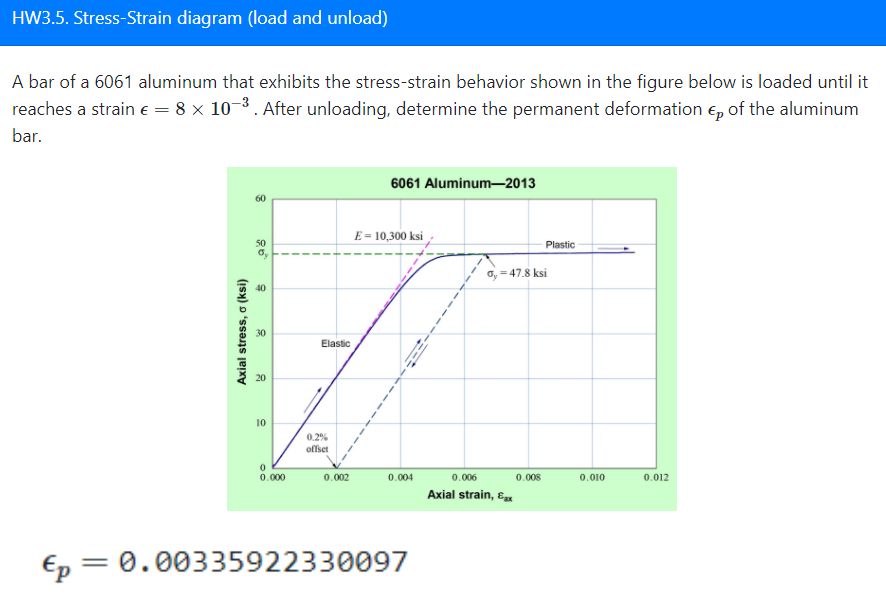
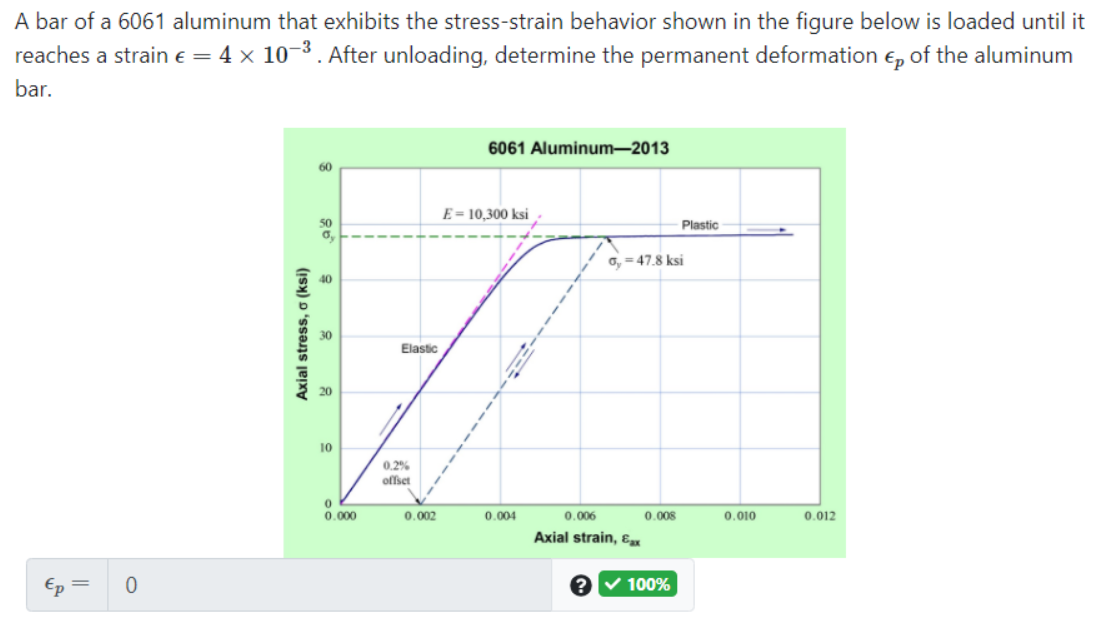
#题目3.5
    #首先看加载到对应形变有没有超过虚线(及不可恢复形变界限)
    #若没超过，unload后应变=0
    #若超过了，unload后应变=ε-σy/E

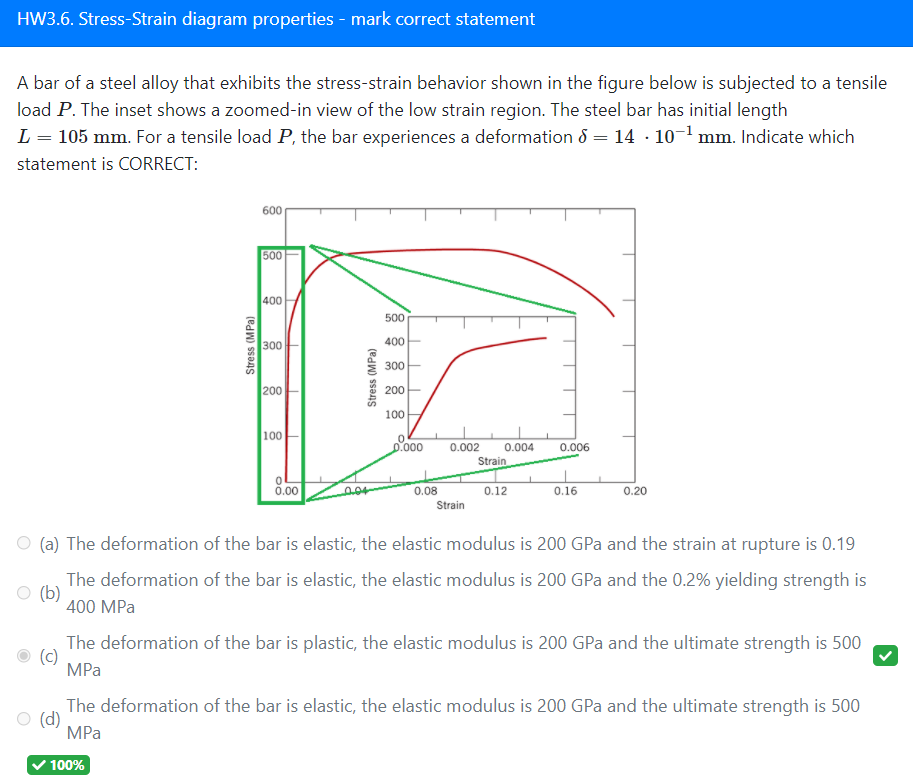
#题目3.6 (不确定)
    #计算应变=1.4/105=0.01333
    #0.01333>0.002 所以是塑性形变
    #弹性模数 Elasticmodulus
        #E=屈服应力/屈服应变=400Mpa/0.002=200Gpa
    #Ultimate strength 看外面的大图最高点

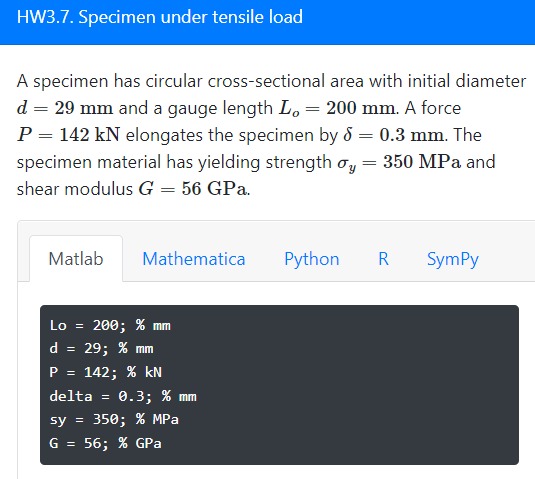
#计算弹性模量 Elastic modulus E
#计算泊松比 v
#计算直径变化

In [3]:
Lo = 200 # mm
d = 29 # mm
P = 142 # kN
delta = 0.3 # mm
sy = 350 # MPa
G = 56 # GPa

#单位换算
lo=Lo*mm
d=d*mm
P=P*1000
delta=delta*mm
sy=sy*1e6
G=G*1e9

#计算面积
S=pi*(d/2)**2
 
#计算线应变 epsilon
epsilon=delta/lo

#计算法应力 sigma
sigma=P/S

#Elastic modulus 弹性模量 计算
E=sigma/epsilon

#Posson ratio 泊松比 计算  (使用三者公式)
v=E/(2*G)-1

#计算直径变化
V0=lo*S
S1=V0/(lo+delta)
##特别注意直径变化计算公式！！！！！！！！！！！！！！！！！！！！！！！！1
sd=delta/lo*v*d #(直径变化量=正应变×泊松比×直径) (不能用体积来算)

print(E/1e9,v,sd*1000)

450.257629805787/pi -1 + 4.02015740898024/pi -0.0435 + 0.17487684729064/pi


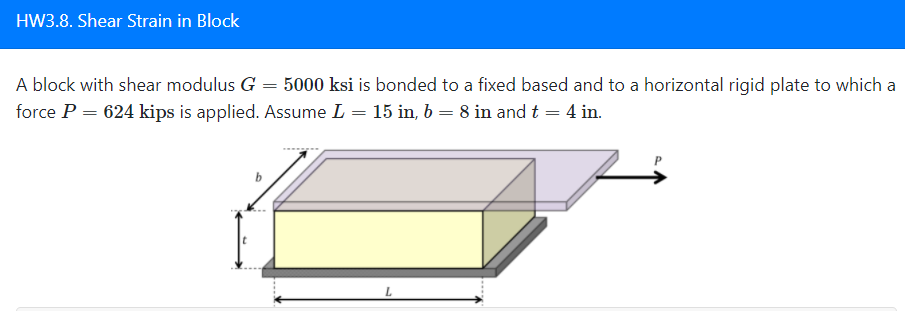

In [4]:
G = 8000 # ksi
P = 633 # kips
Lo = 14 # in
b = 7 # in
t = 3 # in

L=Lo

A=b*L
tau=P/A #ksi

#G剪切模量=剪应力/剪应变
shear_strain=P/A/G

#剪应变=夹角变化！！！！！！！！！！！！ 这里夹角θ≈tanθ
#F/A=u/t → u=F/A*t
u_delta=shear_strain*t

#英制单位
#ksi=1000psi=lb/in**2
#这里单位要注意！！！！！！！！！！！！！！！！！！！！

print(tau,u_delta)

6.459183673469388 0.0024221938775510206


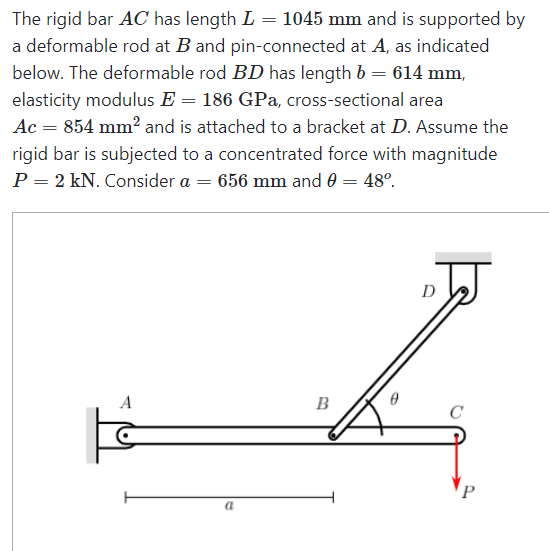
#计算C点下降高度

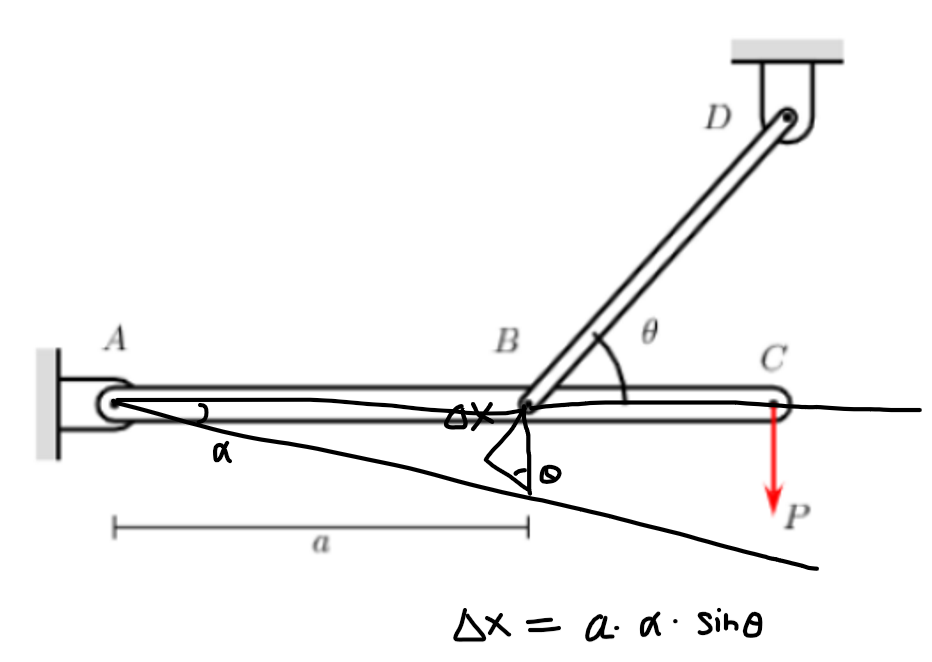

In [7]:
P = 3 # kN
a = 553 # mm
b = 582 # mm
L = 1032 # mm
E = 169 # GPa
Ac = 832 # mm^2
theta = 62 # degrees

#单位转化
P=P*1000
a=a*mm
b=b*mm
L=L*mm
E=E*1e9
Ac=Ac*mm*mm
theta=theta*pi/180

alpha=Symbol('alpha')

#拉伸模量 E= 正应力/正应变
#正应力 σ=力/面积

#计算杆的力（力矩平衡）
Fbd=P*L/a/sin(theta)

#弹性模数→弹性系数
k=E*Ac/b

#计算形变量←正应变
dL=Fbd/k #实际形变

#近似形变
dx=alpha*a*cos(theta)

#alpha=sy.solve([dx-dL],[alpha])[alpha]

#L*alpha/mm

alpha=P*L/k/a/a/sin(theta)/sin(theta) #简化后公式

float(L*alpha/mm)

0.05547195686961762

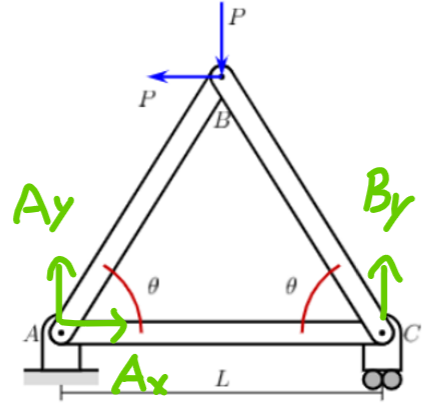

In [ ]:
L = 2266 # mm
Ac = 3250 # mm^2
E = 214 # GPa
P = 454 # kN
theta = 46 # degrees

L=L*mm
A=Ac*mm*mm
E=E*1e9
P=P*1000
theta=theta/180*pi

#计算模长方程
def n(x):
    return np.linalg.norm(x)

#方向向量
fab=np.array([cos(theta),sin(theta)])
fab=fab/n(fab)

fcb=np.array([-cos(theta),sin(theta)])
fcb=fcb/n(fcb)

#计算Fab,Fcb,在P点受力平衡
F1,F2=sy.S('F1,F2')
equx=fab[0]*F1+fcb[0]*F2+P
equy=fab[1]*F1+fcb[1]*F2-P

F2=sy.solve([equx,equy],[F1,F2])[F2]
fac=F2*cos(theta)

sigma=fac/A
dL=sigma/E*L  #注意乘L strain=dL/L 不要忘了
dL/mm

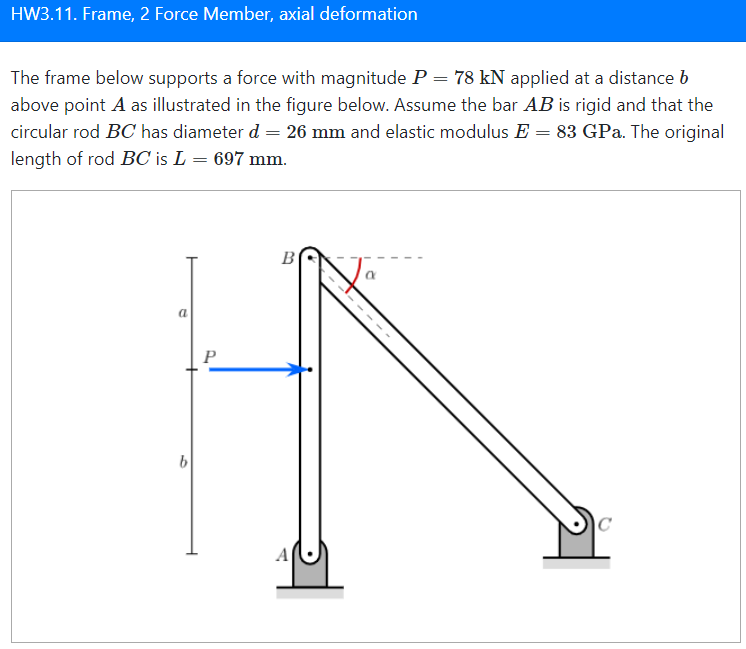

In [9]:
###########################################
P = 78 # kN
d = 26 # mm
E = 83 # GPa
L = 697 # mm
a = 207 # mm
b = 341 # mm
alpha = 45 # degrees

P=P*1000
d=d*mm
E=E*1e9
L=L*mm
a=a*mm
b=b*mm

A=pi*(d/2)**2
alpha=alpha*pi/180

Fb=P*(b)/(a+b)/cos(alpha) 
sigma=Fb/(A)
dL=sigma/E*L  #形变量/原长=应力/弹性模量

print(-Fb/1000,-float(dL/mm))

-48.536496350365*sqrt(2) -1.0856792299334634
